# 2020년의 세계 행복 보고서

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame
import math

#시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.formula.api as smf
import statsmodels.api as sm

#소수점 3자리까지 표시
%precision 3

np.random.seed(100)

In [2]:
#데이터 불러오기
data = pd.read_csv('2020.csv', encoding='cp949').iloc[:,0:13]
data.head(5)

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317


## Bootstrap방법을 통한 표본평균 및 표준오차 구하기

### 1) 샘플사이즈별 부트스트랩 결과 평균, 표준오차, 95% 신뢰구간

### - 변수: 행복지수(Ladder_score)

In [3]:
#샘플사이즈 5에 대한 R=1000일 때 수행한 부트스트랩 결과 평균,표준오차,95% 신뢰구간
iterationNum = 1000
LadderscoreList1 = []
for _ in range(iterationNum):
    bootSample = data.sample(5,replace = True)
    LadderMean = bootSample['Ladder_score'].mean()
    LadderscoreList1.append(LadderMean)
mean1 = np.mean(LadderscoreList1)
SE1 = np.std(LadderscoreList1) / np.sqrt(5)
CI1 = np.percentile(LadderscoreList1, 0.025), np.percentile(LadderscoreList1, 0.975)

mean1,SE1, CI1

(5.4676114540218, 0.22122178824469133, (3.82683370126475, 4.35143307408165))

In [4]:
#샘플사이즈 10에 대한 R=1000일 때 수행한 부트스트랩 결과 평균,표준오차,95% 신뢰구간
iterationNum = 1000
LadderscoreList2 = []
for _ in range(iterationNum):
    bootSample = data.sample(10,replace = True)
    LadderMean = bootSample['Ladder_score'].mean()
    LadderscoreList2.append(LadderMean)
mean2 = np.mean(LadderscoreList2)
SE2 = np.std(LadderscoreList2) / np.sqrt(10)
CI2 = np.percentile(LadderscoreList2, 0.025), np.percentile(LadderscoreList2, 0.975)

mean2,SE2, CI2

(5.472618512943801,
 0.10914581284739319,
 (4.4952529682916245, 4.664014908659675))

In [5]:
#샘플사이즈 20에 대한 R=1000일 때 수행한 부트스트랩 결과 평균,표준오차,95% 신뢰구간
iterationNum = 1000
LadderscoreList3 = []
for _ in range(iterationNum):
    bootSample = data.sample(20,replace = True)
    LadderMean = bootSample['Ladder_score'].mean()
    LadderscoreList3.append(LadderMean)
mean3 = np.mean(LadderscoreList3)
SE3 = np.std(LadderscoreList3) / np.sqrt(20)
CI3 = np.percentile(LadderscoreList3, 0.025), np.percentile(LadderscoreList3, 0.975)

mean3,SE3, CI3

(5.472244127995251, 0.05680818947506884, (4.58079466604735, 4.886461072891738))

In [6]:
#샘플사이즈 40에 대한 R=1000일 때 수행한 부트스트랩 결과 평균,표준오차,95% 신뢰구간
iterationNum = 1000
LadderscoreList4 = []
for _ in range(iterationNum):
    bootSample = data.sample(40,replace = True)
    LadderMean = bootSample['Ladder_score'].mean()
    LadderscoreList4.append(LadderMean)
mean4 = np.mean(LadderscoreList4)
SE4 = np.std(LadderscoreList4) / np.sqrt(40)
CI4 = np.percentile(LadderscoreList4, 0.025), np.percentile(LadderscoreList4, 0.975)

mean4,SE4, CI4

(5.473744888074551,
 0.027231061064786746,
 (4.9304456174575435, 5.073793646463456))

- 표본평균은 5.47정도에 비슷한 모습을 보인다
- 표준오차가 0.22, 0.11, 0.05590, 0.02738 순으로 줄어드는 것을 확인할 수 있다

### 2) 각 샘플사이즈 별 히스토그램

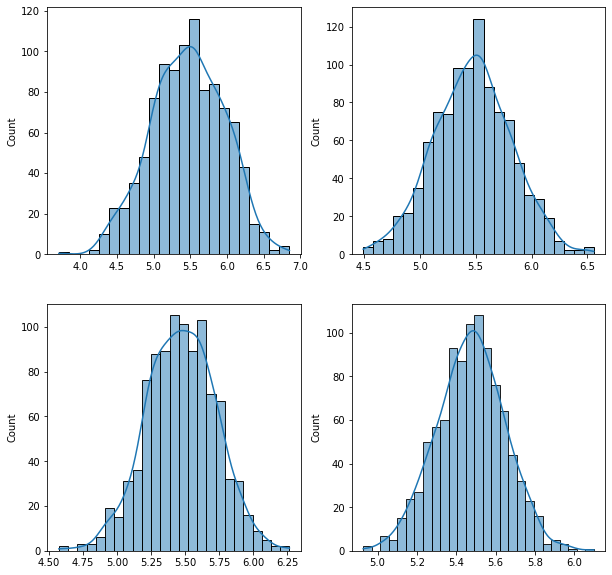

In [7]:
#각 샘플사이즈 별 히스토그램
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.histplot(ax=ax1, x =LadderscoreList1, kde = True)
sns.histplot(ax=ax2, x =LadderscoreList2, kde = True)
sns.histplot(ax=ax3, x =LadderscoreList3, kde = True)
sns.histplot(ax=ax4, x =LadderscoreList4, kde = True)

- 히스토그램 분포와 추세선을 보면 정규분포에 점점 가까워지는 모습을 볼 수 있다

### 3) 각 샘플 사이즈별 QQ plot

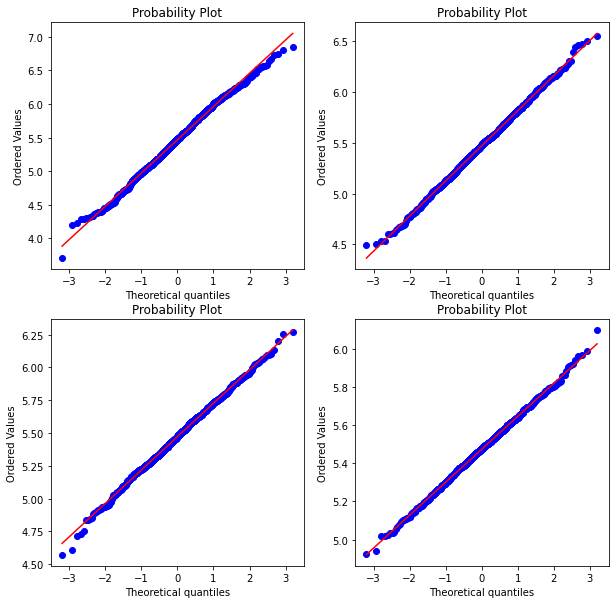

In [8]:
#샘플 사이즈별 QQ plot
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

stats.probplot(LadderscoreList1, plot = ax1)
stats.probplot(LadderscoreList2, plot = ax2)
stats.probplot(LadderscoreList3, plot = ax3)
stats.probplot(LadderscoreList4, plot = ax4)
plt.show()

- 점들이 대각선에 점점 가깝게 놓이는 것을 보아 표본분포가 정규분포에 가까워지는 것을 알 수 있다 

## 보너스)

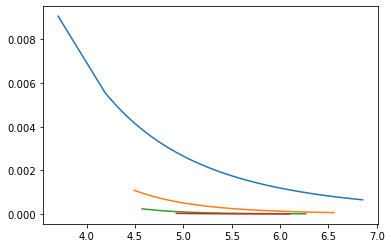

In [9]:
# 각 샘플 사이즈 별 t 분포
plt.plot(sorted(LadderscoreList1),stats.t(4).pdf(sorted(LadderscoreList1)))
plt.plot(sorted(LadderscoreList2),stats.t(9).pdf(sorted(LadderscoreList2)))
plt.plot(sorted(LadderscoreList3),stats.t(19).pdf(sorted(LadderscoreList3)))
plt.plot(sorted(LadderscoreList4),stats.t(39).pdf(sorted(LadderscoreList4)))

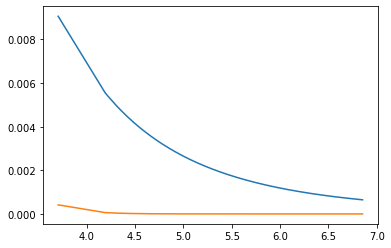

In [10]:
# n = 5일때 정규분포와 t분포 비교
plt.plot(sorted(LadderscoreList1),stats.t(4).pdf(sorted(LadderscoreList1)))
plt.plot(sorted(LadderscoreList1),stats.norm(0,1).pdf(sorted(LadderscoreList1)))

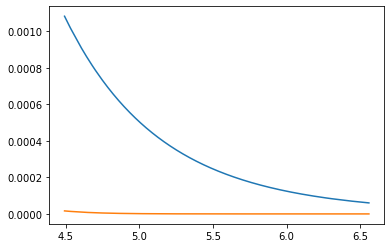

In [11]:
# n = 10일 때 정규분포와 t 분포 비교
plt.plot(sorted(LadderscoreList2),stats.t(9).pdf(sorted(LadderscoreList2)))
plt.plot(sorted(LadderscoreList2),stats.norm(0,1).pdf(sorted(LadderscoreList2)))

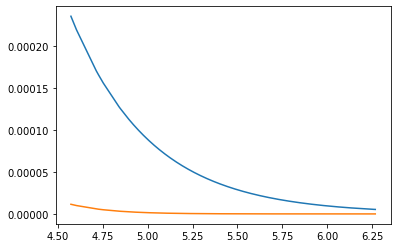

In [12]:
# n = 19일 때 정규분포와 t 분포 비교
plt.plot(sorted(LadderscoreList3),stats.t(19).pdf(sorted(LadderscoreList3)))
plt.plot(sorted(LadderscoreList3),stats.norm(0,1).pdf(sorted(LadderscoreList3)))

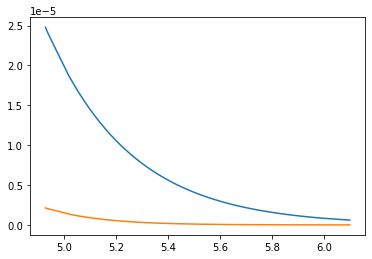

In [13]:
# n = 39일 때 정규분포와 t 분포 비교
plt.plot(sorted(LadderscoreList4),stats.t(39).pdf(sorted(LadderscoreList4)))
plt.plot(sorted(LadderscoreList4),stats.norm(0,1).pdf(sorted(LadderscoreList4)))

- t분포 그래프가 잘려 나와 제대로 된 값을 관찰하기 힘들었다
- 자유도가 높아질수록 t분포그래프가 정규분포그래프에 조금씩 가까워지는 것을 확인할 수 있다.
- 하지만 t분포그래프가 정규분포 그래프보다 높게 나오는 것을 보아 오류가 있는 것 같다.
- 제대로 된 t분포 그래프와 정규분포그래프를 그리는 방법을 찾으면 더 정확한 비교를 할 수 있을 것 같다.